<a href="https://colab.research.google.com/github/MarloEM/AI-Physics-Class/blob/main/Artificial_Intelligence_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Raman Spectroscopy to Screen Diabetes Mellitus with Machine Learning

Data source : https://www.kaggle.com/datasets/codina/raman-spectroscopy-of-diabetes/code

Short Description :

## Preparing the data

Cutting the spectra and applying the SAVGOL filter to remove any noise.

We'll try to plot all the spectra, for each of the locations

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

import scipy
from scipy.signal import savgol_filter #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split #To do K-fold validation
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AGEs.csv to AGEs.csv
Saving earLobe.csv to earLobe.csv
Saving innerArm.csv to innerArm.csv
Saving thumbNail.csv to thumbNail.csv
Saving vein.csv to vein.csv


Ambil data dari dataaset CSV yang disediakan

In [ ]:
dataframes = {}

dataframes['earLobe'] = pd.read_csv('earLobe.csv', index_col=0)
dataframes['vein'] = pd.read_csv('vein.csv', index_col=0)
dataframes['innerArm'] = pd.read_csv('innerArm.csv', index_col=0)
dataframes['thumbNail'] = pd.read_csv('thumbNail.csv', index_col=0)
df_AGEs = pd.read_csv('AGEs.csv', index_col=0)

Menggunakan pandas dataframe, kita coba buka data untuk hasil raman spektroskopi pada kuku jari (thumbnail)

In [ ]:
dataframes['thumbNail']

,has_DM2,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
patientID,,,,,,,,,,,,,,,,,,,,,
ramanShift,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,3150,3151,3152,3153,3154,3155,3156,3157,3158,3159
DM201,1.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,...,0,0,0,0,0,0,0,0,0,0
DM202,1.0,116.4,116.4,116.4,116.4,116.4,116.4,116.4,116.4,116.4,...,0,0,0,0,0,0,0,0,0,0
DM203,1.0,104.8,104.8,104.8,104.8,104.8,104.8,104.8,104.8,104.8,...,0,0,0,0,0,0,0,0,0,0
DM204,1.0,72.6,72.6,72.6,72.6,72.6,72.6,72.6,72.6,72.6,...,0,0,0,0,0,0,0,0,0,0
DM205,1.0,90.2,90.2,90.2,90.2,90.2,90.2,90.2,90.2,90.2,...,0,0,0,0,0,0,0,0,0,0
DM206,1.0,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,0,0,0,0,0,0,0,0,0,0
DM207,1.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,...,0,0,0,0,0,0,0,0,0,0
DM208,1.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(dataframes['thumbNail'])
print(dataframes['earLobe'])

            has_DM2   Var2   Var3   Var4   Var5   Var6   Var7   Var8   Var9  \
patientID                                                                     
ramanShift      NaN    0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   
DM201           1.0  170.0  170.0  170.0  170.0  170.0  170.0  170.0  170.0   
DM202           1.0  116.4  116.4  116.4  116.4  116.4  116.4  116.4  116.4   
DM203           1.0  104.8  104.8  104.8  104.8  104.8  104.8  104.8  104.8   
DM204           1.0   72.6   72.6   72.6   72.6   72.6   72.6   72.6   72.6   
DM205           1.0   90.2   90.2   90.2   90.2   90.2   90.2   90.2   90.2   
DM206           1.0   34.4   34.4   34.4   34.4   34.4   34.4   34.4   34.4   
DM207           1.0   72.0   72.0   72.0   72.0   72.0   72.0   72.0   72.0   
DM208           1.0   49.0   49.0   49.0   49.0   49.0   49.0   49.0   49.0   
DM209           1.0   73.2   73.2   73.2   73.2   73.2   73.2   73.2   73.2   
DM210           1.0  114.0  114.0  114.0  114.0  114

In [ ]:
ramanShift = dataframes['thumbNail'].iloc[[0], 1:]

targets = dataframes['thumbNail']['has_DM2'].iloc[1:]

#Remove the first row of "ramanShift"
#remove the first column of "has_DM2"
for label in dataframes :
    dataframes[label] = dataframes[label].drop(index='ramanShift', axis=0)
    dataframes[label] = dataframes[label].drop(columns= ['has_DM2'], axis=1)

dataframes['earLobe']

,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,...,Var3152,Var3153,Var3154,Var3155,Var3156,Var3157,Var3158,Var3159,Var3160,Var3161
patientID,,,,,,,,,,,,,,,,,,,,,
DM201,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,181.800000,...,0,0,0,0,0,0,0,0,0,0
DM202,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,162.800000,...,0,0,0,0,0,0,0,0,0,0
DM203,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,107.400000,...,0,0,0,0,0,0,0,0,0,0
DM204,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,290.166667,...,0,0,0,0,0,0,0,0,0,0
DM205,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,50.600000,...,0,0,0,0,0,0,0,0,0,0
DM206,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,63.800000,...,0,0,0,0,0,0,0,0,0,0
DM207,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,147.800000,...,0,0,0,0,0,0,0,0,0,0
DM208,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,55.833333,...,0,0,0,0,0,0,0,0,0,0
DM209,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,136.200000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def Plotting_Dataframe_Spectroscopy(df_dict, x_labels, x_axis_begin, x_axis_end) :
    fig, axes = plt.subplots(2, 2, figsize = (18, 12))
    for i, label in enumerate(df_dict) :
        row = i // 2
        col = i % 2
        for target_name, intensity in df_dict[label].iterrows() :
            axes[row, col].plot(x_labels, intensity, label = target_name)
            axes[row, col].set_title(label)
            axes[row, col].set_xlabel('Raman Shift')
            axes[row, col].legend(fontsize = 9)
            axes[row, col].set_ylabel('Intensity')
            axes[row, col].set_xlim([x_axis_begin, x_axis_end])

plt.show()

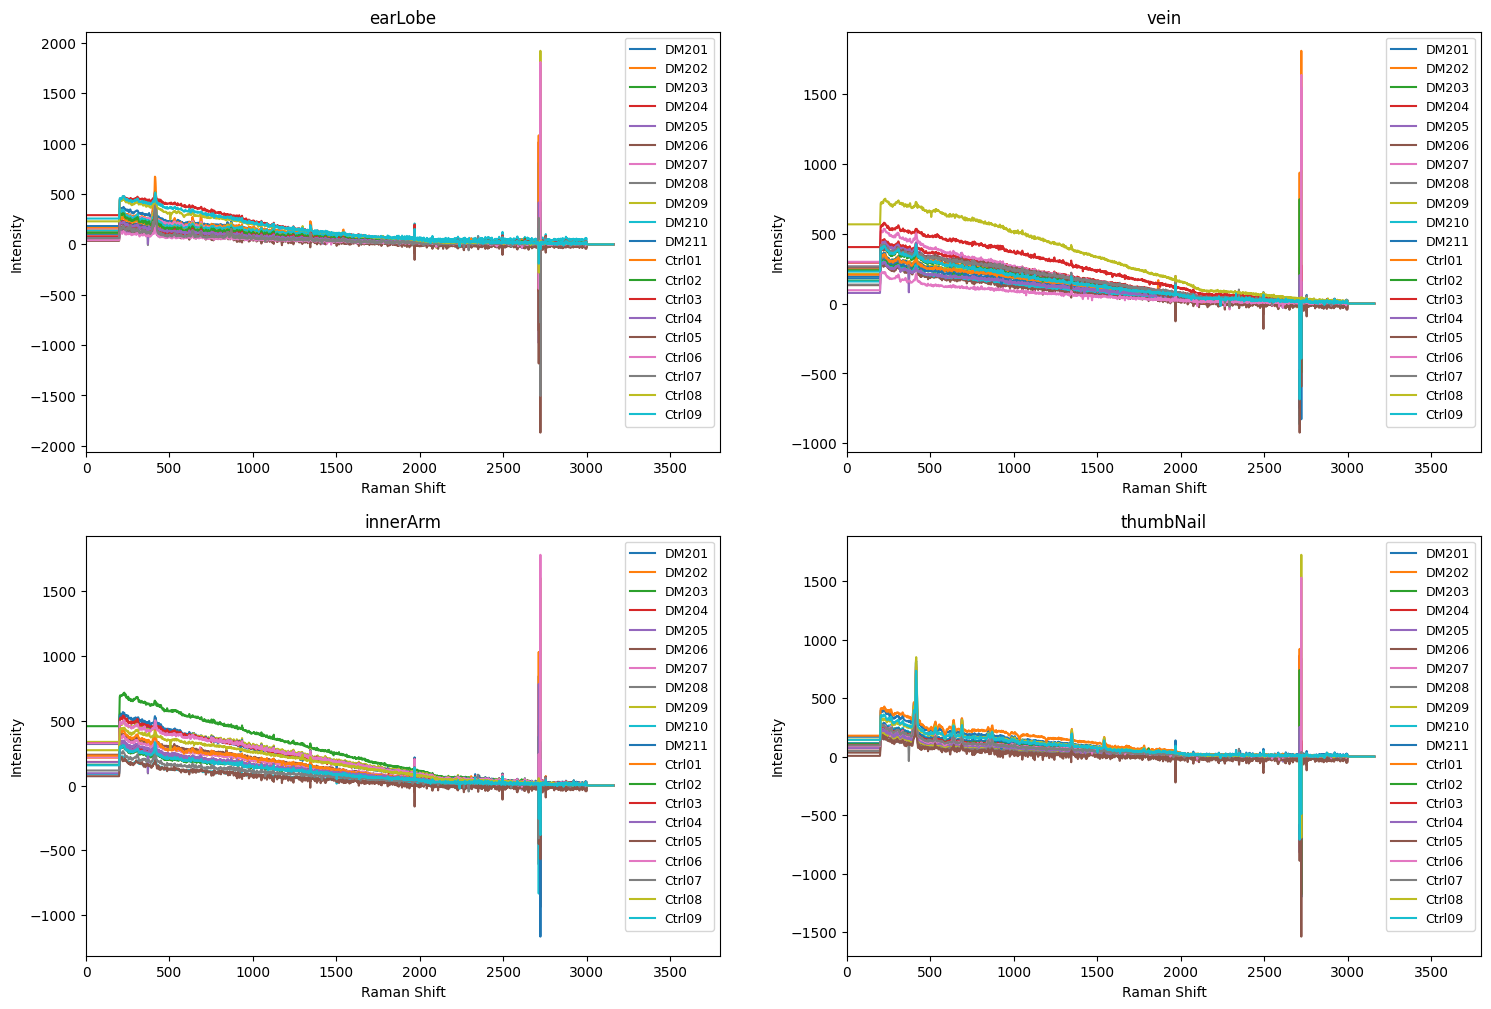

In [ ]:
Plotting_Dataframe_Spectroscopy(dataframes, ramanShift.T, 0, 3800)

Plot salah satu patient saja menggunakan data thumbNail untuk nanti dibandingkan setelah filter SAVGOL

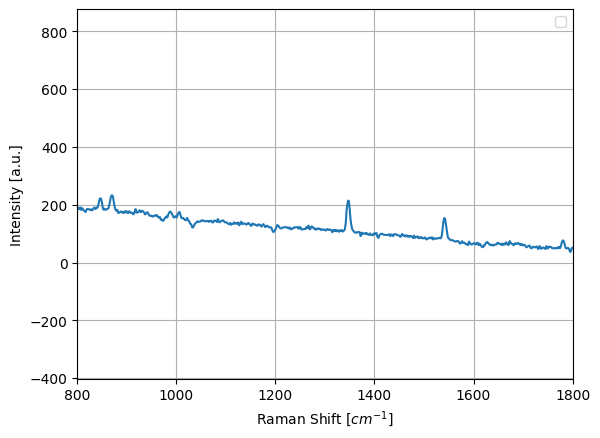

In [ ]:
plt.plot(ramanShift.T, dataframes['thumbNail'].iloc[0,:])
plt.legend()
plt.xlim(800, 1801)
plt.xlabel('Raman Shift [$cm^{-1}$]')
plt.ylabel('Intensity [a.u.]')
plt.grid()
plt.show()

Applying savgol filter and tweaking the parameters

https://en.wikipedia.org/wiki/Savitzky–Golay_filter



```
IModPoly Improved ModPoly[2], which addresses noise issue in ModPoly. It has below 3 parameters.

Modpoly = Modified multi-polynomial fit

1. degree, it refers to polynomial degree, and default value is 2.

2. repitition, it refers to how many iterations to run, and default value is 100.

3. gradient, it refers to gradient for polynomial loss, and default is 0.001. It measures incremental gain over each iteration. If gain in any iteration is less than this, further improvement will stop.
```



In [ ]:
!pip install BaselineRemoval
from BaselineRemoval import BaselineRemoval

def Intensity_Filter_SAVGOL(dataframes, cut_begin, cut_end):
    poly_correction = 2
    savgol_points = 21
    savgol_degrees = 2
    new_df = pd.DataFrame()

    for target_name, intensity in dataframes.iterrows():
        baseObj = BaselineRemoval(intensity[cut_begin:cut_end])
        intensity = baseObj.IModPoly(poly_correction)
        filtered_intensity = savgol_filter(intensity, savgol_points, savgol_degrees)
        new_df = new_df.append(pd.Series(filtered_intensity, name=target_name))

    return new_df



label :  earLobe
label :  vein
label :  innerArm
label :  thumbNail


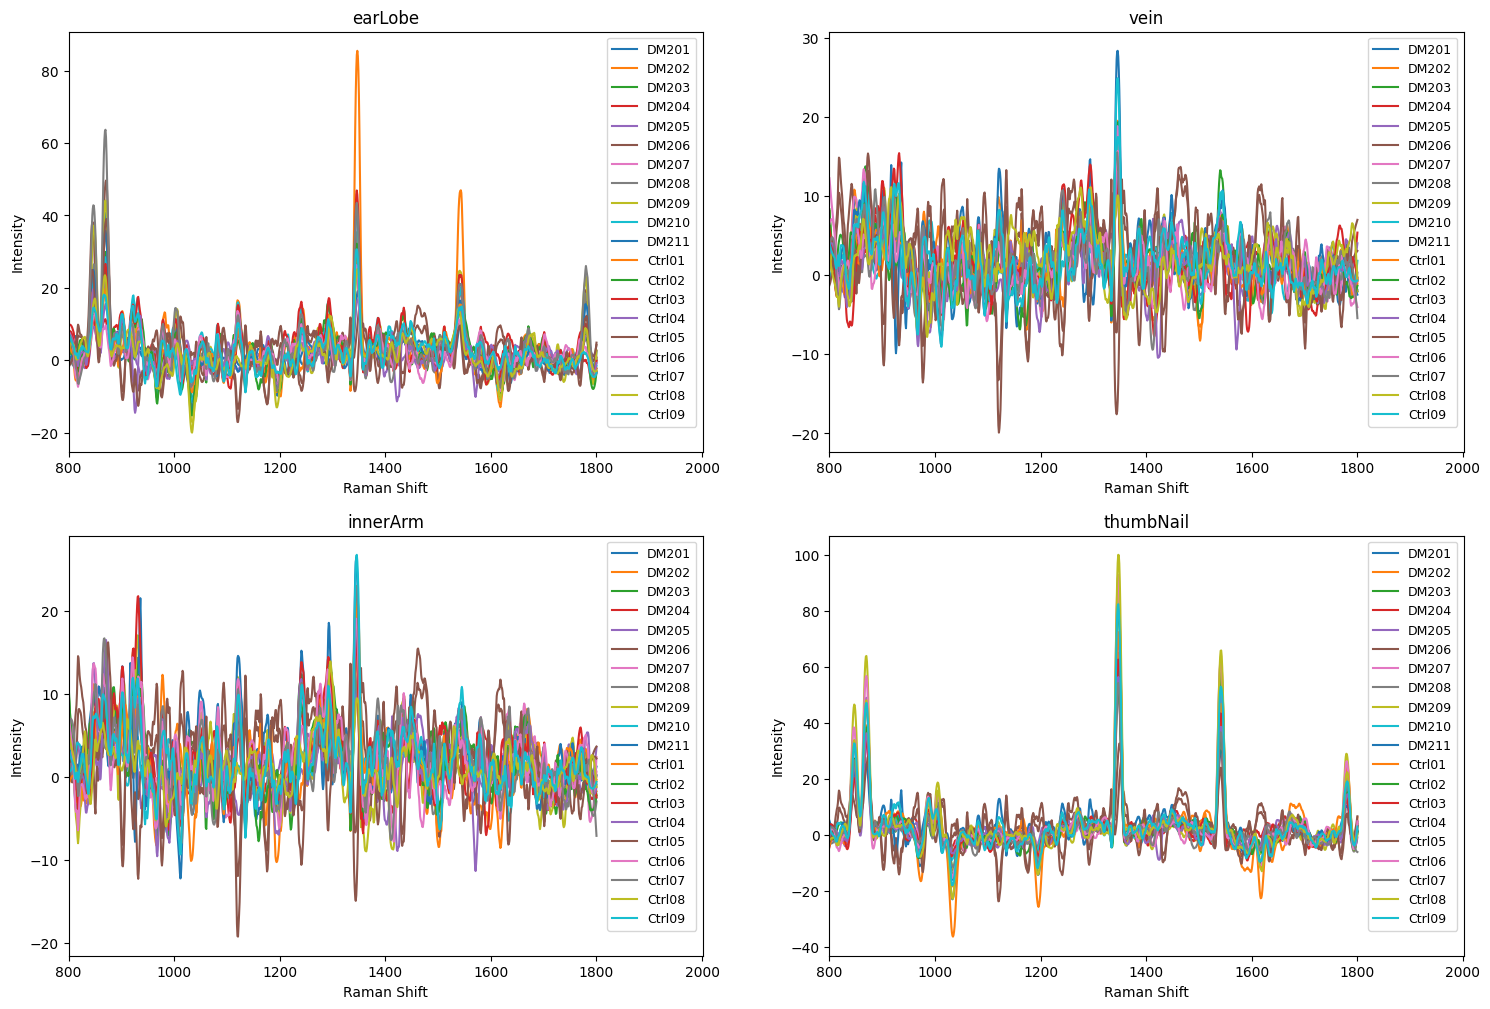

In [ ]:
cut_begin = 800
cut_end = 1801

ramanShift_cut = ramanShift.iloc[:, cut_begin : cut_end]
dataframes_cut = {}

for i, label in enumerate(dataframes) :
    print('label : ', label)
    dataframes_cut[label] = Intensity_Filter_SAVGOL(dataframes[label], cut_begin, cut_end)

Plotting_Dataframe_Spectroscopy(dataframes_cut, ramanShift_cut.T, cut_begin, cut_end + 200)

thumbNail data, setelah di proses, dilakukan BaselineRemoval, dan SAVGOL filter

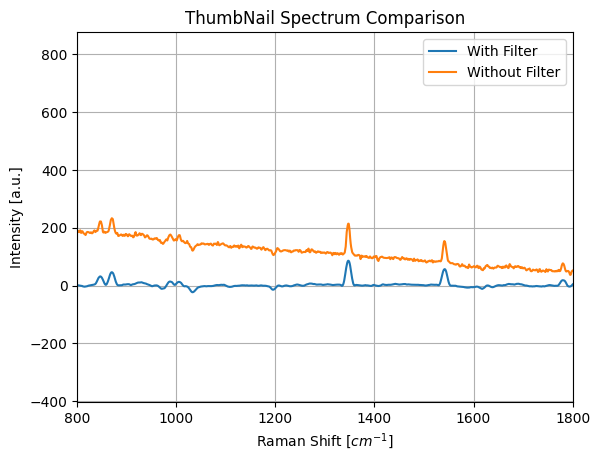

In [ ]:
plt.plot(ramanShift_cut.T, dataframes_cut['thumbNail'].iloc[0,:], label = 'With Filter')
plt.plot(ramanShift.T, dataframes['thumbNail'].iloc[0,:], label = 'Without Filter')
plt.xlim(800, 1801)
plt.xlabel('Raman Shift [$cm^{-1}$]')
plt.ylabel('Intensity [a.u.]')
plt.title('ThumbNail Spectrum Comparison')
plt.legend()
plt.grid()
plt.show()


Plot untuk membandingkan spectra DM2 dan Ctrl

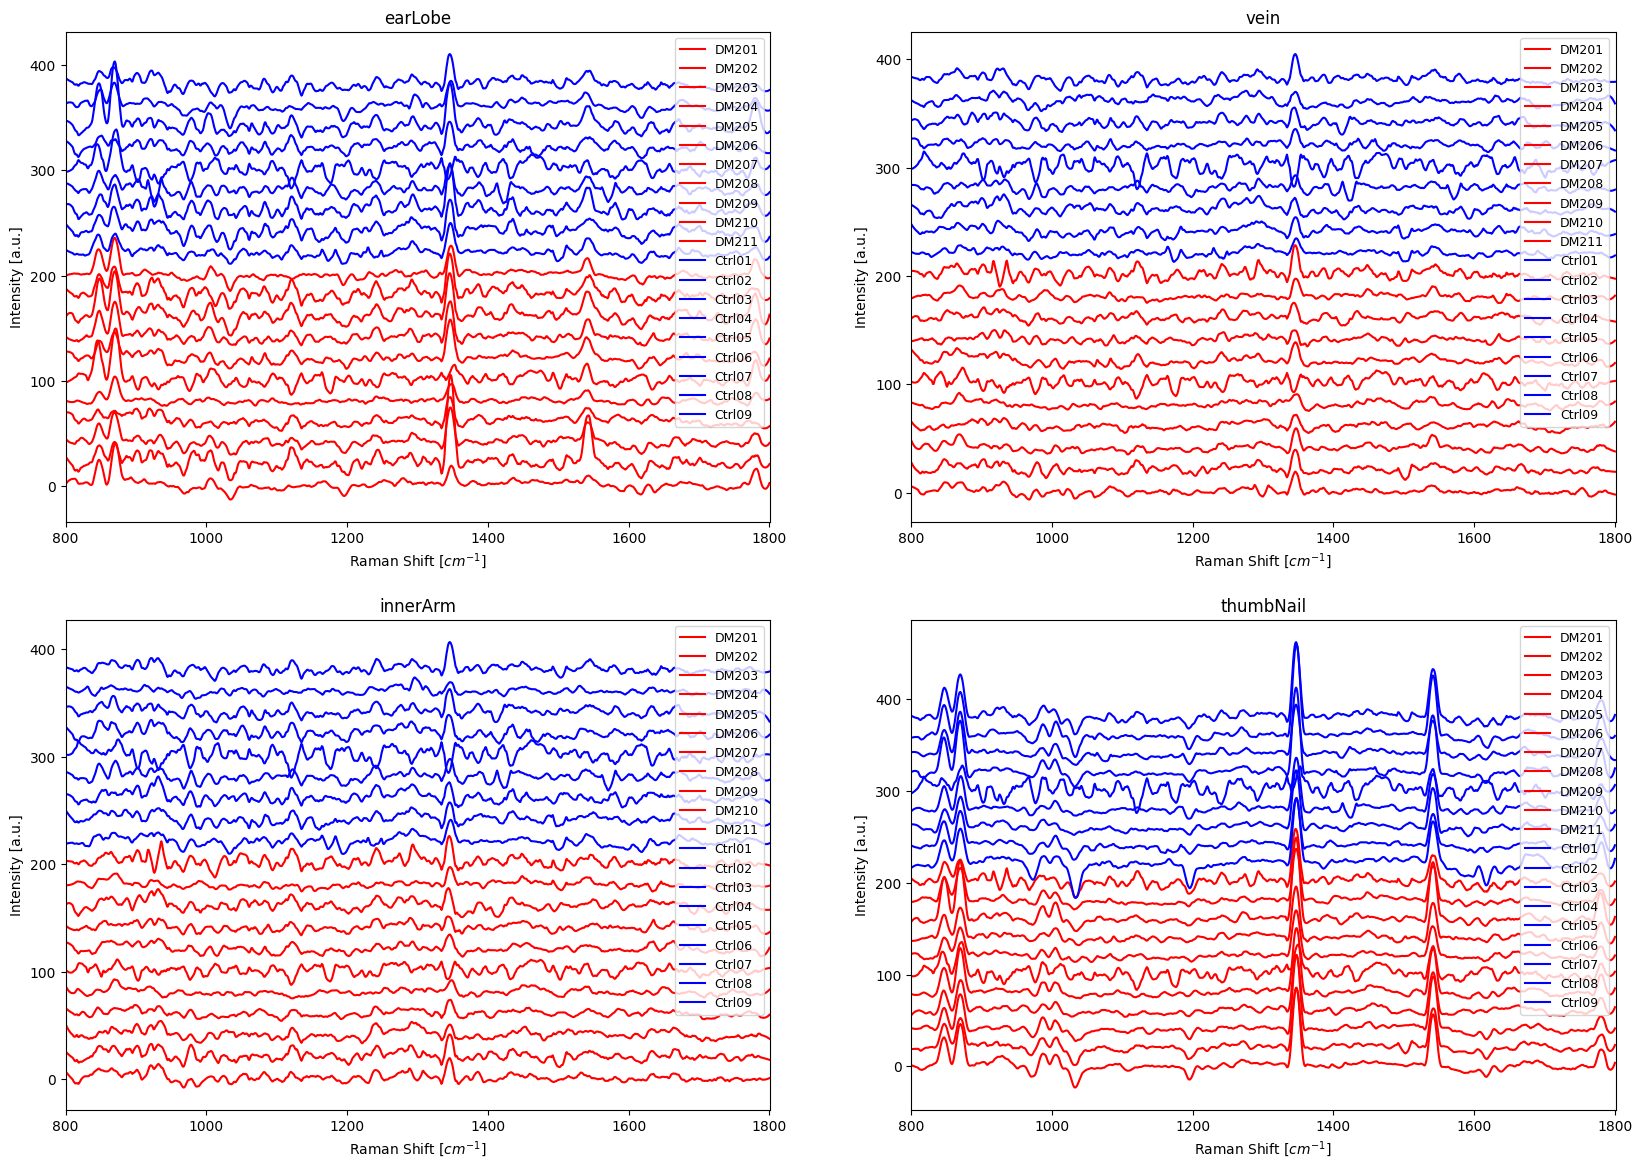

In [ ]:
colour_dict = {0: 'blue', 1: 'red'}

fig, axes = plt.subplots(2, 2, figsize=(20, 14))

for i, label in enumerate(dataframes_cut):
    row = i // 2
    col = i % 2
    for i, (target_name, intensity) in enumerate(dataframes_cut[label].iterrows()):
        colour = int(targets[target_name])
        axes[row, col].plot(ramanShift_cut.T, intensity + i * 20, color=colour_dict[colour], label=target_name)  # Assign a label to each plot line
    axes[row, col].set_xlabel('Raman Shift [$cm^{-1}$]')
    axes[row, col].set_ylabel('Intensity [a.u.]')
    axes[row, col].set_title(label)
    axes[row, col].legend(fontsize=9)
    axes[row, col].set_xlim([cut_begin, cut_end])
plt.show()


Sekarang kita sudah bisa bandingkan dengan AGEs(Advanced Glycation End products)

from ChatGPT :

Advanced glycation end products (AGEs) are a complex group of molecules that are formed through a process called glycation. Glycation occurs when sugars in the bloodstream react with proteins, lipids, or nucleic acids without the control of enzymes. This reaction leads to the formation of irreversible chemical structures known as AGEs.

AGEs can accumulate in various tissues and organs throughout the body, particularly in individuals with chronic conditions such as diabetes. They are implicated in the pathogenesis of several age-related diseases, including diabetes complications, cardiovascular diseases, neurodegenerative disorders, and chronic kidney disease.

The formation and accumulation of AGEs are associated with prolonged exposure to high blood sugar levels, oxidative stress, and inflammation. AGEs can alter the structure and function of proteins, impairing their normal biological activity. They can also induce inflammation and oxidative stress, leading to tissue damage and dysfunction.

In addition to being formed endogenously within the body, AGEs can also be ingested through the diet, primarily from foods that are cooked at high temperatures or processed. Foods rich in protein and fat are more prone to the formation of AGEs during cooking or processing.

Measurement and assessment of AGEs in biological samples, such as blood or tissues, can provide insights into the extent of glycation and its potential impact on health and disease. Various analytical techniques, including spectroscopy and immunoassays, are employed to detect and quantify AGEs.

Controlling blood sugar levels, adopting a healthy diet, and minimizing exposure to excessive heat during cooking are some strategies to reduce the formation and accumulation of AGEs in the body.

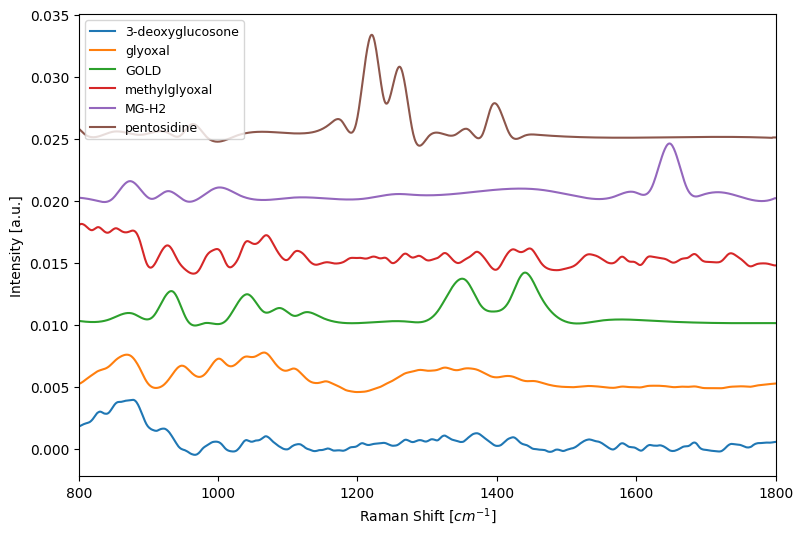

In [ ]:
import matplotlib.pyplot as plt
df_AGEs = df_AGEs.drop(index='ramanShift', axis=0)
fig, ax = plt.subplots(figsize=(9, 6))

def AGE_Plot(df_plot, x_begin, x_end):
    for i, (AGE_name, intensity) in enumerate(df_plot.iterrows()):
        ax.plot(ramanShift_cut.T, intensity + i*0.005, label=AGE_name)

    ax.set_xlabel('Raman Shift [$cm^{-1}$]')
    ax.set_ylabel('Intensity [a.u.]')
    ax.legend(fontsize=9)
    ax.set_xlim([x_begin, x_end])

    plt.show()

AGE_Plot(df_AGEs, cut_begin, cut_end)

## Building The Model

We will try to use an artificial neuralnetwork to try and classify the AGEs in each of the datas randomly. Note that there isnt much samples as the source only give us data from 20 patients, where each patients are measured in 4 different locations. In total we have 80 different raman spectra data.

Then we will try to use PCA to do a feature reduction on the raman spectra datas, then use SVM to do a classification of the AGEs on the raman spectra.

First, lets do thumbNail data, and do a classification by comparing the AGEs spectra characteristics with the raman Spectra gathered.

In [ ]:
import pandas as pd
from sklearn import preprocessing

df_processed = {}

# Data preprocessing
def Dataframe_Normalization():
    for label, dataframe in dataframes.items():
        df_processed[label] = pd.DataFrame()
        for _, intensity in dataframe.iterrows():
            normalized_intensity = intensity / intensity[0]
            selected_intensity = normalized_intensity[cut_begin:cut_end]
            df_processed[label] = df_processed[label].append(selected_intensity)
        scaler = preprocessing.StandardScaler()
        df_processed[label] = scaler.fit_transform(df_processed[label])

Dataframe_Normalization()

print(df_processed['thumbNail'], dataframes['thumbNail'])


[[-0.29938324 -0.30740295 -0.33240308 ...  0.31725891  0.44243881
   0.50714083]
 [-0.31289861 -0.33334324 -0.33081285 ...  0.15605225  0.23523152
   0.23958088]
 [-0.24800303 -0.27142414 -0.27860405 ...  0.67131133  0.16836782
  -0.28844037]
 ...
 [-0.26560866 -0.27756391 -0.29371546 ... -0.05725115 -0.79064004
  -1.26236969]
 [-0.2879003  -0.300979   -0.30732824 ...  0.26383793  0.25515432
   0.24332827]
 [-0.30056901 -0.31153021 -0.30664272 ...  0.51424149  0.2498984
  -0.02792359]]             Var2   Var3   Var4   Var5   Var6   Var7   Var8   Var9  Var10  \
patientID                                                                  
DM201      170.0  170.0  170.0  170.0  170.0  170.0  170.0  170.0  170.0   
DM202      116.4  116.4  116.4  116.4  116.4  116.4  116.4  116.4  116.4   
DM203      104.8  104.8  104.8  104.8  104.8  104.8  104.8  104.8  104.8   
DM204       72.6   72.6   72.6   72.6   72.6   72.6   72.6   72.6   72.6   
DM205       90.2   90.2   90.2   90.2   90.2   90.2  

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**StandardScaler**

standardize features by removing the mean and scaling to unit varience

**scaler.fit_transform**

Fit to data, then transform it.
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

accuracy from earLobe normalized dataset
Average Recall: [0.36666666666666664, 0.4333333333333333, 0.8, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
Average Accuracy: [0.35, 0.3, 0.8, 0.7, 0.75, 0.75, 0.75, 0.75, 0.7, 0.75, 0.75, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


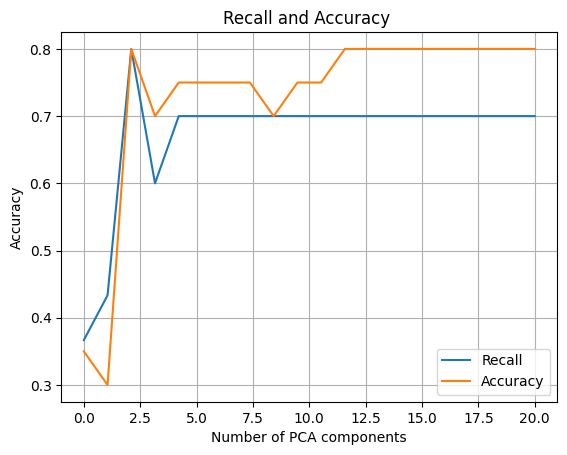

accuracy from vein normalized dataset
Average Recall: [0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.5333333333333333, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.6, 0.6, 0.7, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5]
Average Accuracy: [0.5, 0.45, 0.5, 0.5, 0.55, 0.65, 0.7, 0.7, 0.75, 0.75, 0.75, 0.7, 0.7, 0.75, 0.75, 0.65, 0.65, 0.65, 0.65, 0.65]


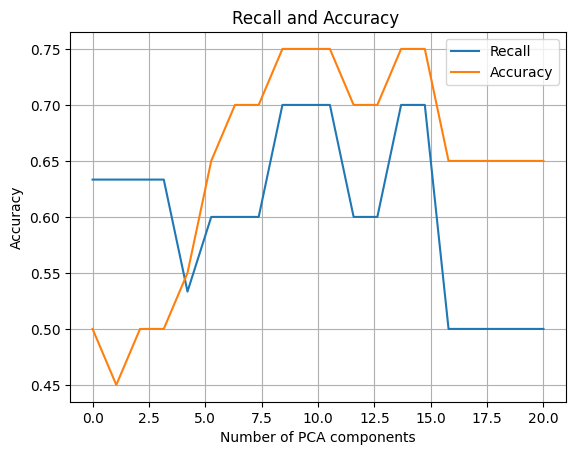

accuracy from innerArm normalized dataset
Average Recall: [0.7, 0.7, 0.6333333333333333, 0.6, 0.7333333333333333, 0.7333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
Average Accuracy: [0.75, 0.55, 0.55, 0.55, 0.6, 0.6, 0.6, 0.7, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.6, 0.65, 0.7, 0.6, 0.6]


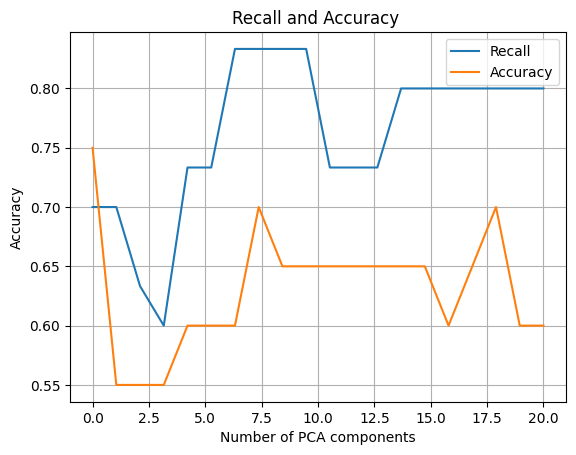

accuracy from thumbNail normalized dataset
Average Recall: [0.5, 0.6, 0.6, 0.5, 0.6666666666666666, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6]
Average Accuracy: [0.4, 0.45, 0.45, 0.35, 0.5, 0.45, 0.6, 0.45, 0.65, 0.6, 0.6, 0.6, 0.6, 0.7, 0.5, 0.5, 0.5, 0.55, 0.55, 0.55]


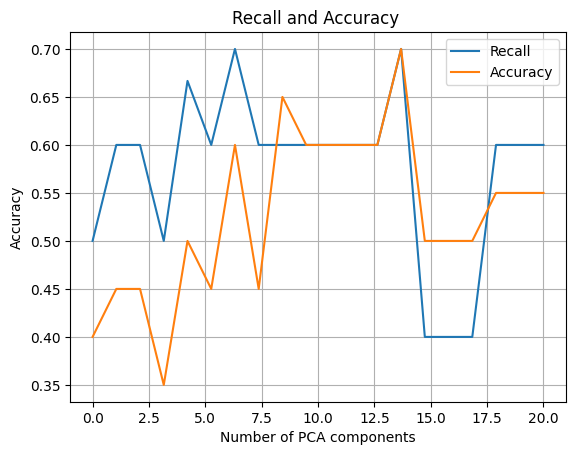

In [ ]:
from xgboost import XGBClassifier

def Plot_PCAXGB_Classifier(Recall, Accuracy) :
    No_PCA_Test = 20
    pca_dimension = np.linspace(0, No_PCA_Test, No_PCA_Test)

    fig, axs = plt.subplots()


    plt.plot(pca_dimension, Recall, label = 'Recall')
    plt.plot(pca_dimension, Accuracy, label = 'Accuracy')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Number of PCA components')
    plt.title('Recall and Accuracy ')
    plt.grid()
    plt.show()

def Build_XGB_Classifier(df_processed, label, No_PCA_Test=20, No_of_Estimator=200, learning_rate=0.1, cv=5):
    XGB_Classifier = XGBClassifier(n_estimators=No_of_Estimator, learning_rate=learning_rate)
    average_recall = []
    average_accuracy = []

    for i in range(No_PCA_Test):
        pca = PCA(n_components=i + 1)
        Transformed_Data_PCA = pca.fit_transform(df_processed[label])
        recall = cross_val_score(XGB_Classifier, Transformed_Data_PCA, targets, cv=cv, scoring='recall')
        average_recall.append(recall.mean())
        accuracy = cross_val_score(XGB_Classifier, Transformed_Data_PCA, targets, cv=cv, scoring='accuracy')
        average_accuracy.append(accuracy.mean())

    print("Average Recall:", average_recall)
    print("Average Accuracy:", average_accuracy)
    return average_recall, average_accuracy

for label, _ in dataframes.items():
    print('accuracy from', label, 'normalized dataset')
    average_recall, average_accuracy = Build_XGB_Classifier(df_processed, label, 20, 200, 0.1, 5)
    Plot_PCAXGB_Classifier(average_recall, average_accuracy)



- Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the sum of true positives and false negatives. It measures the ability of the model to correctly identify positive samples from all the actual positive samples. A higher recall value indicates better performance in capturing positive instances.
- Accuracy is the ratio of the number of correct predictions to the total number of predictions. It measures the overall correctness of the model's predictions. While accuracy is a commonly used metric, it may not be suitable for imbalanced datasets where the classes are unevenly distributed.

#Building Model from Kaggle (Test)

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

class NN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NN, self).__init__()
        self.dropout_probability = 0.1
        self.fc_layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            #nn.Dropout(self.dropout_probability),
            #nn.Linear(100, 50),
            #nn.ReLU(),
            #nn.Dropout(self.dropout_probability),
            #nn.Linear(50, hidden_size),
            #nn.ReLU(),
            nn.Dropout(self.dropout_probability),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.fc_layers(x)
        return x

def weights_init(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()
        torch.nn.init.xavier_uniform(m.weight.data)
        m.bias.data.fill_(0.01)

In [ ]:
def NN_cross_val(data, targets, model, cv=5, train_epochs=20):

    num_epochs = train_epochs
    learning_rate = 0.00005
    criterion = nn.BCELoss()

    scores = []
    kfold = StratifiedKFold(n_splits=cv) #needed to avoid imbalanced subsets

    #optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.005)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_steps = np.linspace(0, num_epochs, num_epochs)
    losses = np.zeros((num_epochs))
    evals = np.zeros((num_epochs))
    losses_list = []
    evals_list = []

    for i, (train_index, test_index) in enumerate(kfold.split(data,targets)):

        #We reset the weights
        #to avoid having an already trained model after the first loop
        model.apply(weights_init)
        #Generate a new dataset with the index from StratifiedKFold
        train_data = torch.tensor(Subset(data, train_index))
        train_targets = torch.tensor(Subset(targets, train_index))
        eval_data_subset = Subset(data, test_index)
        eval_data = torch.tensor(eval_data_subset)
        eval_targets_subset = Subset(targets, test_index)
        eval_targets = torch.tensor(eval_targets_subset)

        losses = np.zeros((num_epochs))
        evals = np.zeros((num_epochs))

        for epoch in range(num_epochs):

            model.train()
            for j, X_train  in enumerate(train_data):
                y_preds = model(X_train)
                loss = criterion(y_preds.squeeze(), train_targets[j])
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            losses[epoch] = loss.item()

            model.eval()
            for j, X_valid in enumerate(eval_data):
                with torch.no_grad():
                    y_preds = model(X_valid)
                    loss = criterion(y_preds.squeeze(), eval_targets[j])
            evals[epoch] = loss.item()

            print (f'Subset number: {i+1}, Epoch [{epoch+1}/{num_epochs}], Loss: {losses[epoch]}, Eval: {evals[epoch]}', end='\r')

        y_preds = model(eval_data).detach().numpy()

        scores.append(accuracy_score(eval_targets, y_preds.round()))
        losses_list.append(losses)
        evals_list.append(evals)

    plt.figure(figsize=(12,2.5))
    plt.subplot(1,2,1)
    for loss in losses_list:
        plt.plot(train_steps, loss, label = f'Subset{i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'small')

    plt.subplot(1,2,2)
    for loss in evals_list:
        plt.plot(train_steps, loss, label = f'Subset{i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Eval loss')
    plt.legend(fontsize = 'small')
    plt.show()

    return scores

cpu


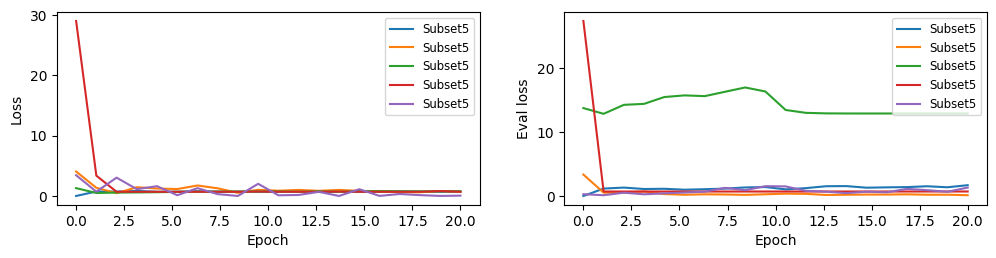

[0.75, 0.75, 0.5, 0.5, 0.5]


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

hidden_size = 10
earlobe_model = NN(cut_end-cut_begin, hidden_size).to(device).double()
earlobe_scores = NN_cross_val(dataframes_cut['earLobe'].values, targets.values, earlobe_model, 5, 20)
print(earlobe_scores)

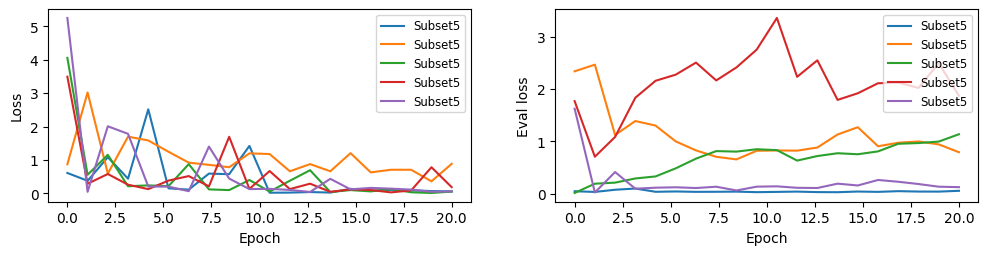

[0.75, 0.75, 0.5, 0.5, 0.25]


In [ ]:
hidden_size = 20
vein_model = NN(cut_end-cut_begin, hidden_size).to(device).double()
vein_scores = NN_cross_val(dataframes_cut['vein'].values, targets.values, vein_model, 5, 20)
print(vein_scores)

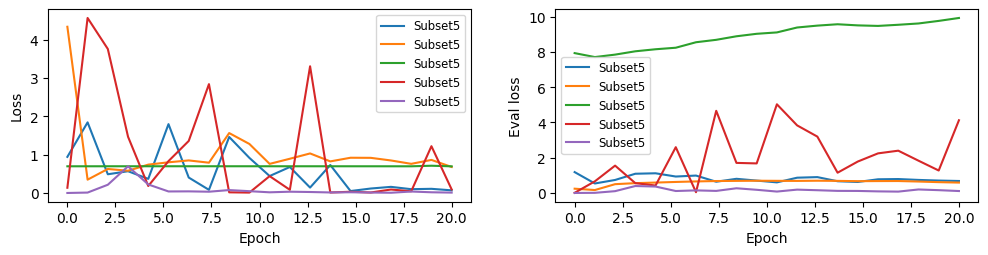

[0.5, 0.75, 0.5, 0.75, 0.5]


In [ ]:
hidden_size = 10
innerArm_model = NN(cut_end-cut_begin, hidden_size).to(device).double()
innerArm_scores = NN_cross_val(dataframes_cut['innerArm'].values, targets.values, innerArm_model, 5, 20)
print(innerArm_scores)

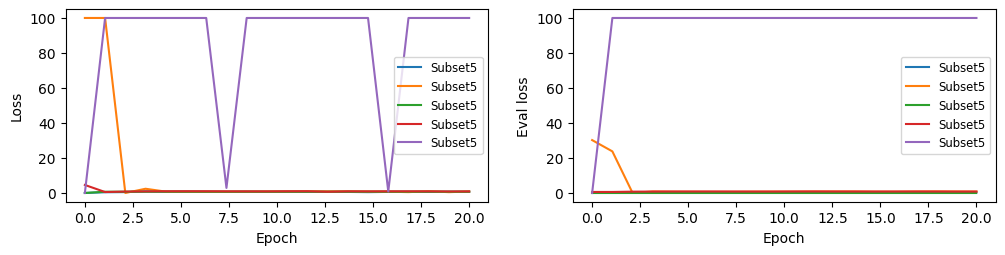

[0.5, 0.75, 0.5, 0.5, 0.5]


In [ ]:
hidden_size = 10
thumbNail_model = NN(cut_end-cut_begin, hidden_size).to(device).double()
thumbNail_scores = NN_cross_val(dataframes_cut['thumbNail'].values, targets.values, thumbNail_model, 5, 20)
print(thumbNail_scores)

In [ ]:
print("earLobe dataset, accuracy: ", np.mean(earlobe_scores), " standard deviation:", np.std(earlobe_scores))
print("vein dataset accuracy: ", np.mean(vein_scores), " standard deviation:", np.std(vein_scores))
print("innerArm dataset accuracy: ", np.mean(innerArm_scores), " standard deviation:", np.std(innerArm_scores))
print("thumbNail dataset accuracy: ", np.mean(thumbNail_scores), " standard deviation:", np.std(thumbNail_scores))

earLobe dataset, accuracy:  0.6  standard deviation: 0.1224744871391589
vein dataset accuracy:  0.55  standard deviation: 0.18708286933869706
innerArm dataset accuracy:  0.6  standard deviation: 0.1224744871391589
thumbNail dataset accuracy:  0.55  standard deviation: 0.09999999999999999


  # TEST Keras.Layers:

(64, 1001) (64,)
Epoch 1/30
2/2 [==============================] - 4s 3s/step - loss: 0.6831 - accuracy: 0.5469 - val_loss: 0.6252 - val_accuracy: 0.5625
Epoch 2/30
2/2 [==============================] - 0s 47ms/step - loss: 0.4393 - accuracy: 0.8906 - val_loss: 0.5920 - val_accuracy: 0.6875
Epoch 3/30
2/2 [==============================] - 0s 44ms/step - loss: 0.2988 - accuracy: 0.9688 - val_loss: 0.5554 - val_accuracy: 0.7500
Epoch 4/30
2/2 [==============================] - 0s 61ms/step - loss: 0.2211 - accuracy: 0.9844 - val_loss: 0.5174 - val_accuracy: 0.7500
Epoch 5/30
2/2 [==============================] - 0s 79ms/step - loss: 0.1615 - accuracy: 1.0000 - val_loss: 0.4814 - val_accuracy: 0.7500
Epoch 6/30
2/2 [==============================] - 0s 115ms/step - loss: 0.1221 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.8750
Epoch 7/30
2/2 [==============================] - 0s 66ms/step - loss: 0.0903 - accuracy: 1.0000 - val_loss: 0.4040 - val_accuracy: 0.8750
Epoch 8/30


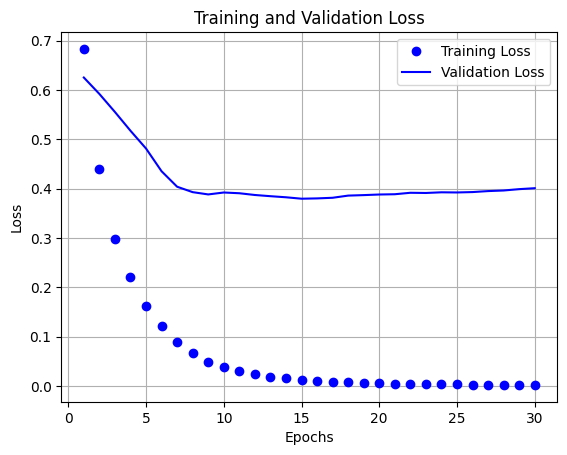

In [ ]:
spectra = np.concatenate((dataframes_cut['earLobe'], dataframes_cut['innerArm'], dataframes_cut['vein'], dataframes_cut['thumbNail']), axis = 0)
targets_repeated = np.tile(targets, 4)
scaler = preprocessing.StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)


X_train, X_test, y_train, y_test = train_test_split(scaled_spectra, targets_repeated, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

model_NN = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_NN.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)


#Plotting Epochs with accuracy and losses of the model
History_NN = model_NN.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data=(X_test, y_test))

accuracy = model_NN.evaluate(X_test, y_test)
print('Loss , Accuracy :', accuracy)
predictions = model_NN.predict(X_test)

History_dict = History_NN.history
loss_values = History_dict["loss"]
val_loss_values = History_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(
    epochs,
    loss_values, "bo",
    label = "Training Loss"
)
plt.plot(
    epochs,
    val_loss_values, "b",
    label = "Validation Loss"
)
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(X_train.shape, y_train.shape)

(64, 1001) (64,)


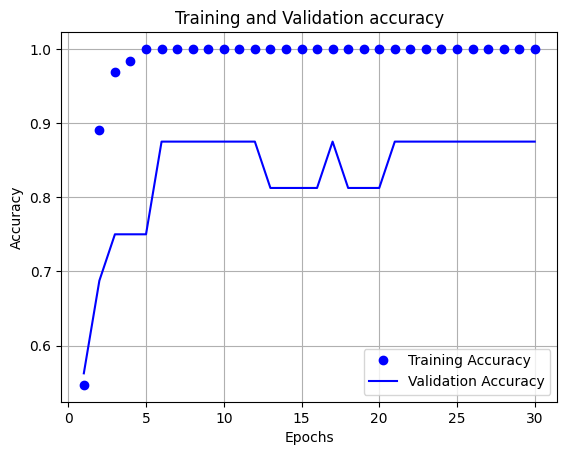

In [ ]:
accuracy = History_dict["accuracy"]
val_accuracy = History_dict["val_accuracy"]
plt.clf()
plt.plot(
    epochs,
    accuracy,
    "bo",
    label = 'Training Accuracy'
)
plt.plot(
    epochs,
    val_accuracy,
    "b",
    label = 'Validation Accuracy'
)
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
Results = model_NN.evaluate(X_test, y_test)

1/1 [==============================] - 0s 33ms/step - loss: 0.4010 - accuracy: 0.8750


1/1 [==============================] - 0s 25ms/step


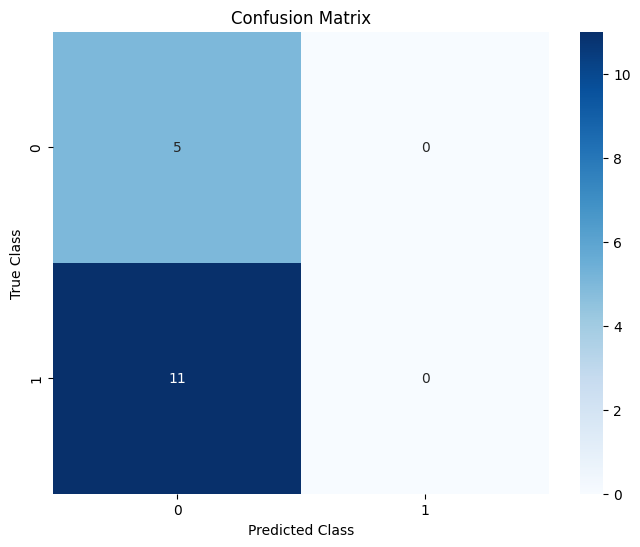

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import seaborn as sbn

y_pred = model_NN.predict(X_test)
y_pred_label = np.argmax(y_pred, axis = 1)
confusion_Mat_NN = confusion_matrix(y_test, y_pred_label)

plt.figure(figsize=(8, 6))
sbn.heatmap(confusion_Mat_NN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

#Model 2 (Another Configuration)

[[ 0.04152335  0.11799678  0.19137504 ...  0.4384733   0.73624247
   0.94395479]
 [-1.2120701  -1.25793821 -1.29225379 ...  0.39485532  0.74251394
   1.00434822]
 [-1.22400749 -1.23913    -1.21378716 ...  3.28180655  2.87599415
   2.25823861]
 ...
 [-1.89312424 -1.85654328 -1.79538659 ...  0.76594886  1.45760562
   1.98708031]
 [ 1.16886739  1.27191072  1.36199223 ... -0.58708172 -0.50002545
  -0.37716684]
 [-0.23657498 -0.33695638 -0.43322887 ... -0.42350626 -0.46226782
  -0.46964147]] (64, 1001)
[0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.] (64,)
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.8642 - accuracy: 0.4688 - val_loss: 0.8042 - val_accuracy: 0.5625
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 0.5696 - accuracy: 0.7969 - val_loss: 0.5409 - val_accuracy: 0.6875
Epoch 3/20
1/1 [===

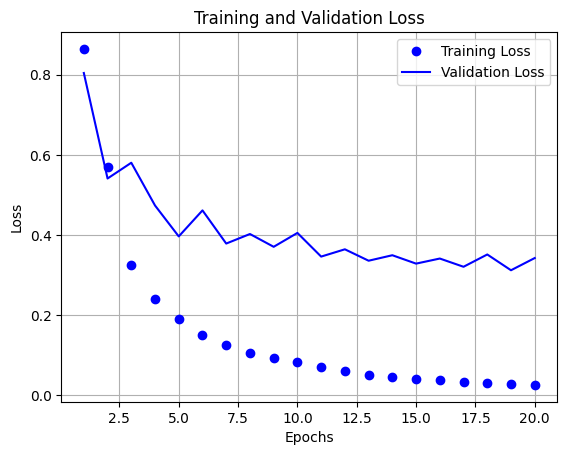

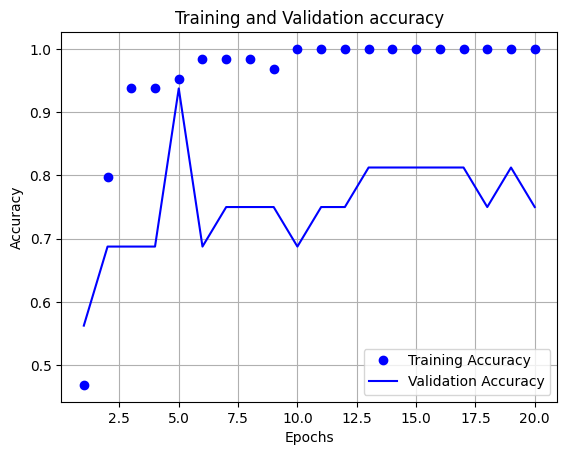

Epoch 1/4
1/1 [==============================] - 3s 3s/step - loss: 1.1189 - accuracy: 0.5156
Epoch 2/4
1/1 [==============================] - 0s 17ms/step - loss: 0.7264 - accuracy: 0.5625
Epoch 3/4
1/1 [==============================] - 0s 15ms/step - loss: 0.5893 - accuracy: 0.6719
Epoch 4/4
1/1 [==============================] - 0s 16ms/step - loss: 0.4406 - accuracy: 0.8125
Test Loss : 0.46875
Test Accuracy : 0.796875


In [ ]:
spectra = np.concatenate((dataframes_cut['earLobe'], dataframes_cut['innerArm'], dataframes_cut['vein'], dataframes_cut['thumbNail']), axis = 0)
targets_repeated = np.tile(targets, 4)
scaler = preprocessing.StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)

X_train, X_test, y_train, y_test = train_test_split(scaled_spectra, targets_repeated, test_size=0.2, random_state=42)
print(X_train, X_train.shape)
print(y_train, y_train.shape)

model_NN_2 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_NN_2.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)

History_NN_2 = model_NN_2.fit(X_train, y_train, epochs = 20, batch_size = 512, validation_data=(X_test, y_test))

accuracy = model_NN_2.evaluate(X_test, y_test)
predictions = model_NN_2.predict(X_test)

#Plotting the Training and Validation losses
History_dict = History_NN_2.history
loss_values = History_dict["loss"]
val_loss_values = History_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(
    epochs,
    loss_values, "bo",
    label = "Training Loss"
)
plt.plot(
    epochs,
    val_loss_values, "b",
    label = "Validation Loss"
)
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

#Plotting the Training and Validation Accuracies
accuracy = History_dict["accuracy"]
val_accuracy = History_dict["val_accuracy"]
plt.clf()
plt.plot(
    epochs,
    accuracy,
    "bo",
    label = 'Training Accuracy'
)
plt.plot(
    epochs,
    val_accuracy,
    "b",
    label = 'Validation Accuracy'
)
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

model_NN_2 = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(12, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model_NN_2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
    )

model_NN_2.fit(
    X_train,
    y_train,
    epochs=4,
    batch_size=512,
    )

print('Test Loss :', accuracy[0])
print('Test Accuracy :', accuracy[1])

##Test 2 NN,
# with stratifiedKFold training


In [ ]:
#Final prep of the data
spectra = np.concatenate((dataframes_cut['earLobe'], dataframes_cut['innerArm'], dataframes_cut['vein'], dataframes_cut['thumbNail']), axis = 0)
print(spectra)
targets_repeated = np.tile(targets, 4)
scaler = preprocessing.StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)
print(targets_repeated.shape, scaled_spectra.shape)

X_train, X_test, y_train, y_test = train_test_split(scaled_spectra, targets_repeated, test_size=0.2, random_state=42)

#Make the model
def Build_Model_Raman_DM2():
    Model_Raman_DM2 = keras.Sequential([
        layers.Dense(64, activation = 'relu'),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])

    Model_Raman_DM2.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = 'accuracy'
    )
    return Model_Raman_DM2
#Apply kFold Training
k = 5
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k) :
    print(f'Processing Fold #{i}')
    val_data = X_train[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [X_train[: i*num_val_samples],
         X_train[(i+1) * num_val_samples:]],
        axis= 0
    )
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i+1) * num_val_samples:]],
        axis = 0
    )
    Model_Raman_DM2 = Build_Model_Raman_DM2()
    Model_Raman_DM2.fit(
        partial_train_data,
        partial_train_targets,
        epochs = 20,
        batch_size = 16,
        verbose = 0
    )
    Loss, Accuracy = Model_Raman_DM2.evaluate(
        val_data,
        val_targets,
        verbose = 0
    )
    print("Loss, Accuracy : ", Loss, Accuracy)

[[ 1.49328402  2.3979987   3.21272518 ... -0.445303    0.91533092
   2.5736927 ]
 [ 7.83386343  6.78540477  5.77556823 ... -1.18749045 -0.35541352
   0.65913056]
 [ 4.69418053  3.9089896   3.2052462  ... -0.94754527 -0.21168997
   0.70306733]
 ...
 [ 2.19112631  2.38455247  2.52370105 ... -5.86304849 -6.09898759
  -6.18292907]
 [-1.97352892 -1.74176019 -1.54271775 ... -1.54869936 -0.82632119
   0.14859364]
 [ 2.21043504  1.75653371  1.33913227 ... -0.70015256  0.94456873
   2.93385036]]
(80,) (80, 1001)
Processing Fold #0
Loss, Accuracy :  0.5340457558631897 0.75
Processing Fold #1
Loss, Accuracy :  1.1689257621765137 0.5833333134651184
Processing Fold #2
Loss, Accuracy :  0.9387073516845703 0.5
Processing Fold #3


Loss, Accuracy :  0.6083243489265442 0.6666666865348816
Processing Fold #4


Loss, Accuracy :  0.21069855988025665 0.8333333134651184
